In [1]:
%%capture
!pip install bertopic

/bin/bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by /bin/bash)

         .:::.     .::.       
        ....yy:    .yy.       
        :.  .yy.    y.        
             :y:   .:         
             .yy  .:          
              yy..:           
              :y:.            
              .y.             
             .:.              
        ....:.                
        :::.                  

• Project files and data should be stored in /project. This is shared among everyone
  in the project.
• Personal files and configuration should be stored in /home/faculty.
• Files outside /project and /home/faculty will be lost when this server is terminated.
• Create custom environments to setup your servers reproducibly.

bash: /opt/anaconda/envs/Python3/lib/libtinfo.so.6: no version information available (required by bash)
  Using cached bertopic-0.15.0-py2.py3-none-any.whl (143 kB)
  Using cached umap_learn-0.5.3-py3-none-any.whl
  

In [1]:
import os
import sys
import re

parent_directory = os.path.abspath('..')
sys.path.append(parent_directory)

from gensim.test.utils import common_texts
from gensim.corpora.dictionary import Dictionary
from Preprocess import preprocess
from Plot import plot_df_bootstrapped
import pandas as pd
df= preprocess('Data/articles.json')

# Create a dictionary from the tokenized documents
dictionary = Dictionary(df['content'])

# Run the preprocessing 
df= preprocess('Data/articles.json')

# Create a dictionary from the tokenized documents
dictionary = Dictionary(df['content'])


[nltk_data] Downloading package stopwords to
[nltk_data]     /home/faculty/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /home/faculty/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/faculty/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [2]:
df['Month'] = df['year-month'].dt.month
df['Year'] = df['year-month'].dt.year

def stratified_bootstrap_sample(df, month_col, year_col, k):
    sample = df.groupby([year_col, month_col]).apply(lambda x: x.sample(n=k, replace=True))
    return sample
num_samples = 15
instances_per_month = 20

bootstrapped_samples = [stratified_bootstrap_sample(df, month_col='Month', year_col='Year', k=instances_per_month) for _ in range(num_samples)]

In [3]:
from bertopic import BERTopic

def apply_bert_topic_model(corpus, language="english", top_n_words=20, n_gram_range=(1, 2),
                           min_topic_size=100, nr_topics=None, low_memory=True):

    common_corpus = [','.join(text).replace(',',' ') for text in corpus['content']]

    # # Initialize the BERTopic model
    topic_model = BERTopic()

    topics, probs = topic_model.fit_transform(common_corpus)

    topic_distr, _ = topic_model.approximate_distribution(common_corpus)

    topics = topic_model.get_topics()

    sorted_topics = sorted(topics.items(), key=lambda x: max([weight for _, weight in x[1]]), reverse=True)

    selected_topics = sorted_topics[:50]

    for topic_id, topic_keywords in selected_topics:
         topic_name = ' '.join([keyword for keyword, _ in topic_keywords])
         corpus[topic_name] = [distr[topic_id] for distr in topic_distr]

    return corpus

2023-06-29 17:34:25.192365: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /opt/anaconda/envs/Python3/lib:
2023-06-29 17:34:25.192398: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [4]:
topic_model_results = []
# Iterate over the bootstrapped samples and apply BERTopic to each sample
for sample in bootstrapped_samples:
    # Get the content data from the sample (adjust the column name if needed)
    
    # Apply BERTopic to the sample and obtain the topics and probabilities
    df= apply_bert_topic_model(sample)
    # Store the topic modeling results for the current sample
    topic_model_results.append(df)

def plot(df_distribution, a):
    topic_means = df_distribution.groupby('year-month').mean()
    plot_df_bootstrapped(topic_means,indexes = a)

# Topic Plastic Bags

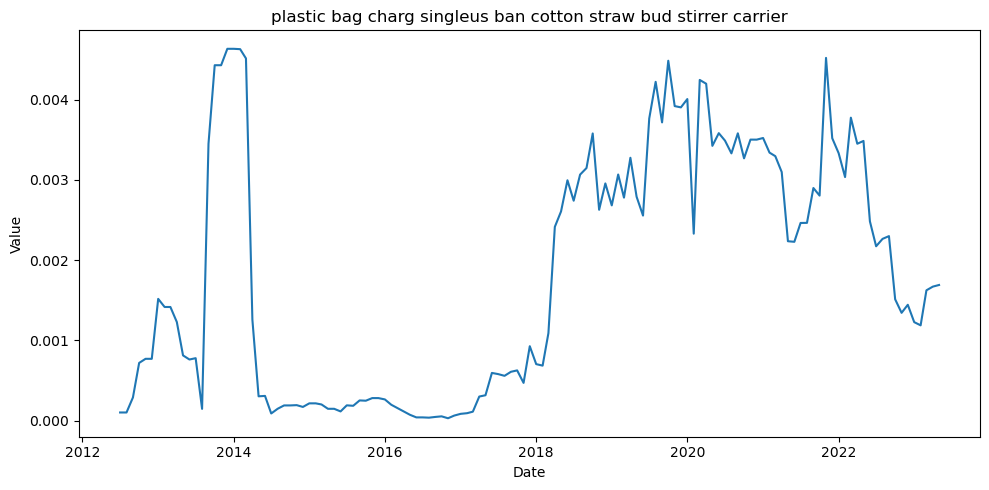

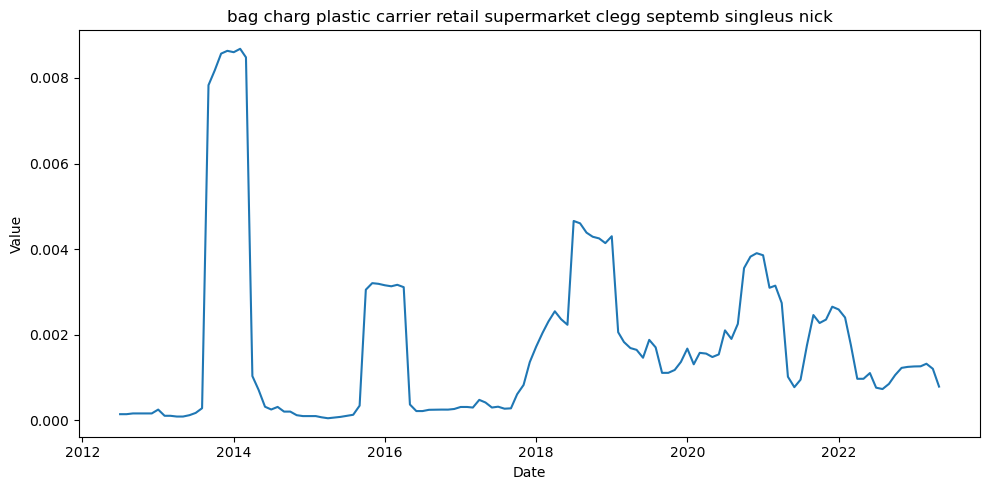

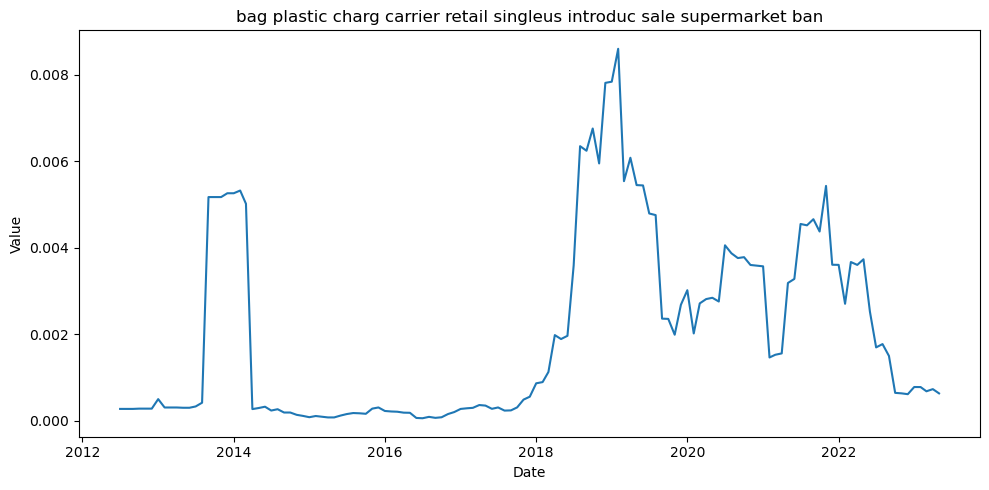

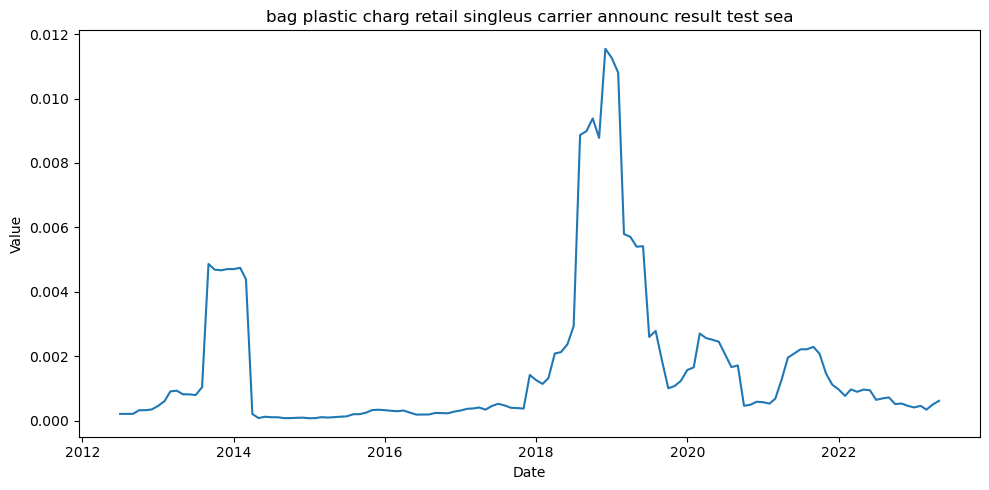

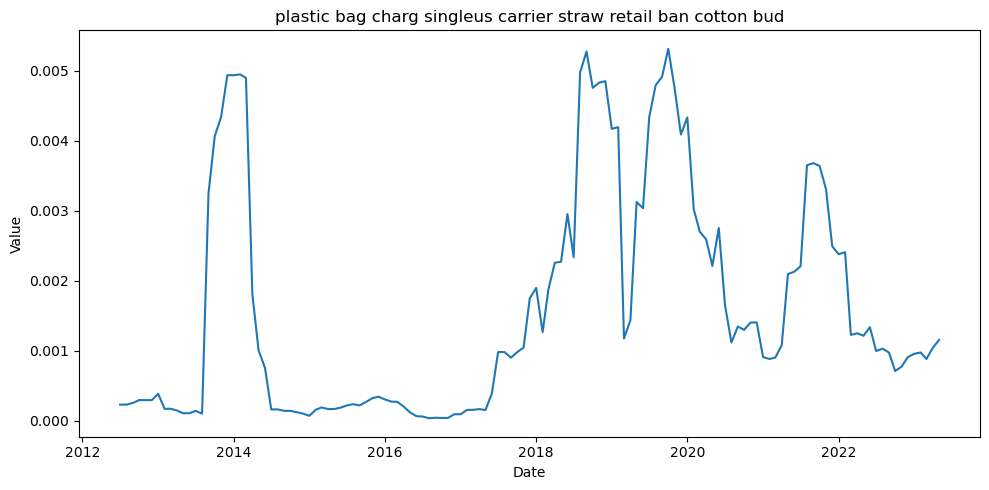

In [43]:
plot(topic_model_results[0], [5])
plot(topic_model_results[1], [2])
plot(topic_model_results[2], [2])
plot(topic_model_results[5], [5])
plot(topic_model_results[6], [3])

# Fish

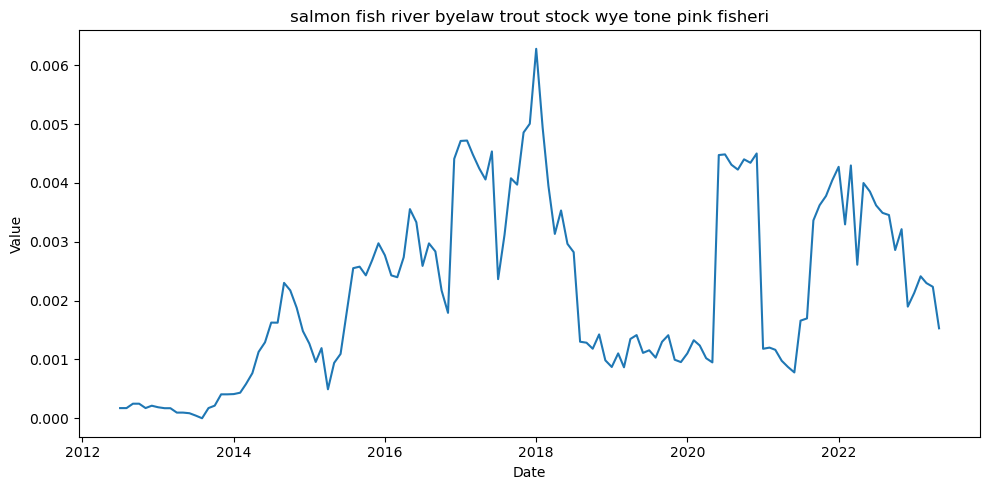

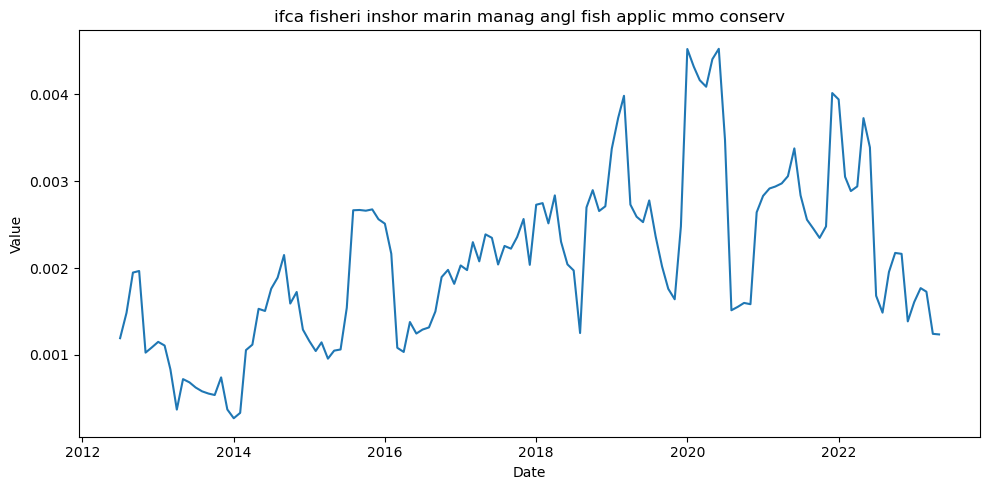

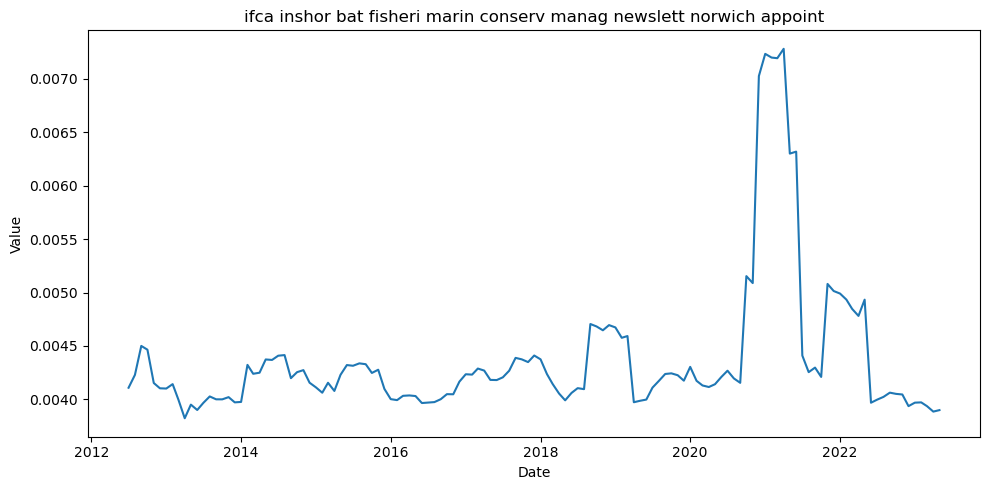

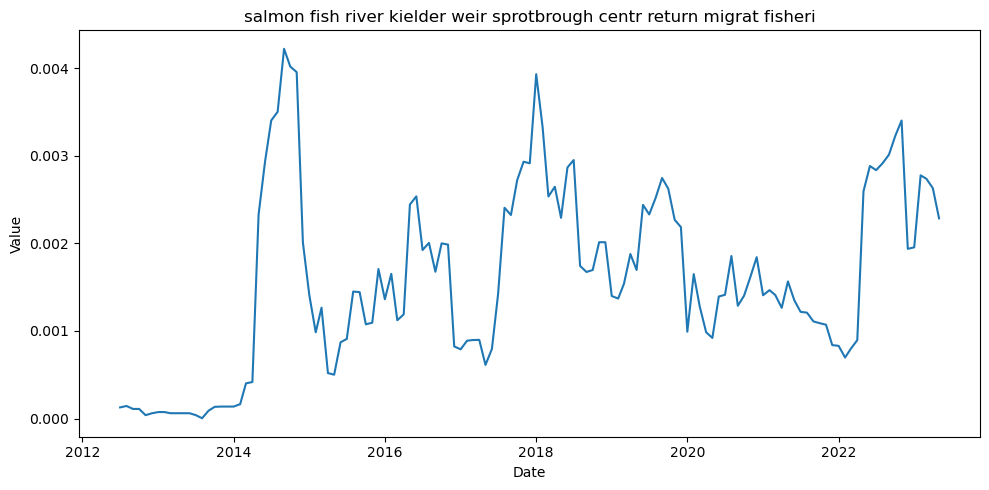

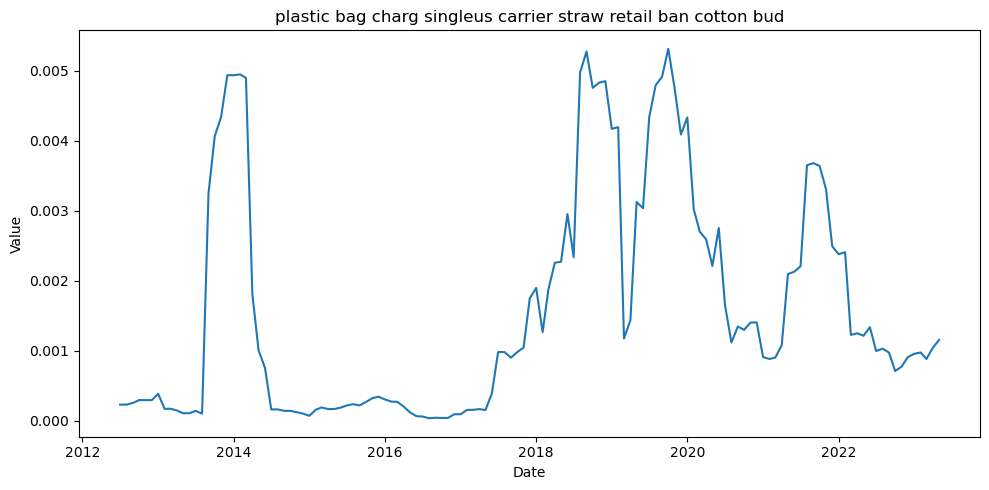

In [44]:
plot(topic_model_results[0], [2])
plot(topic_model_results[1], [9])
plot(topic_model_results[2], [10])
plot(topic_model_results[5], [3])
plot(topic_model_results[6], [3])

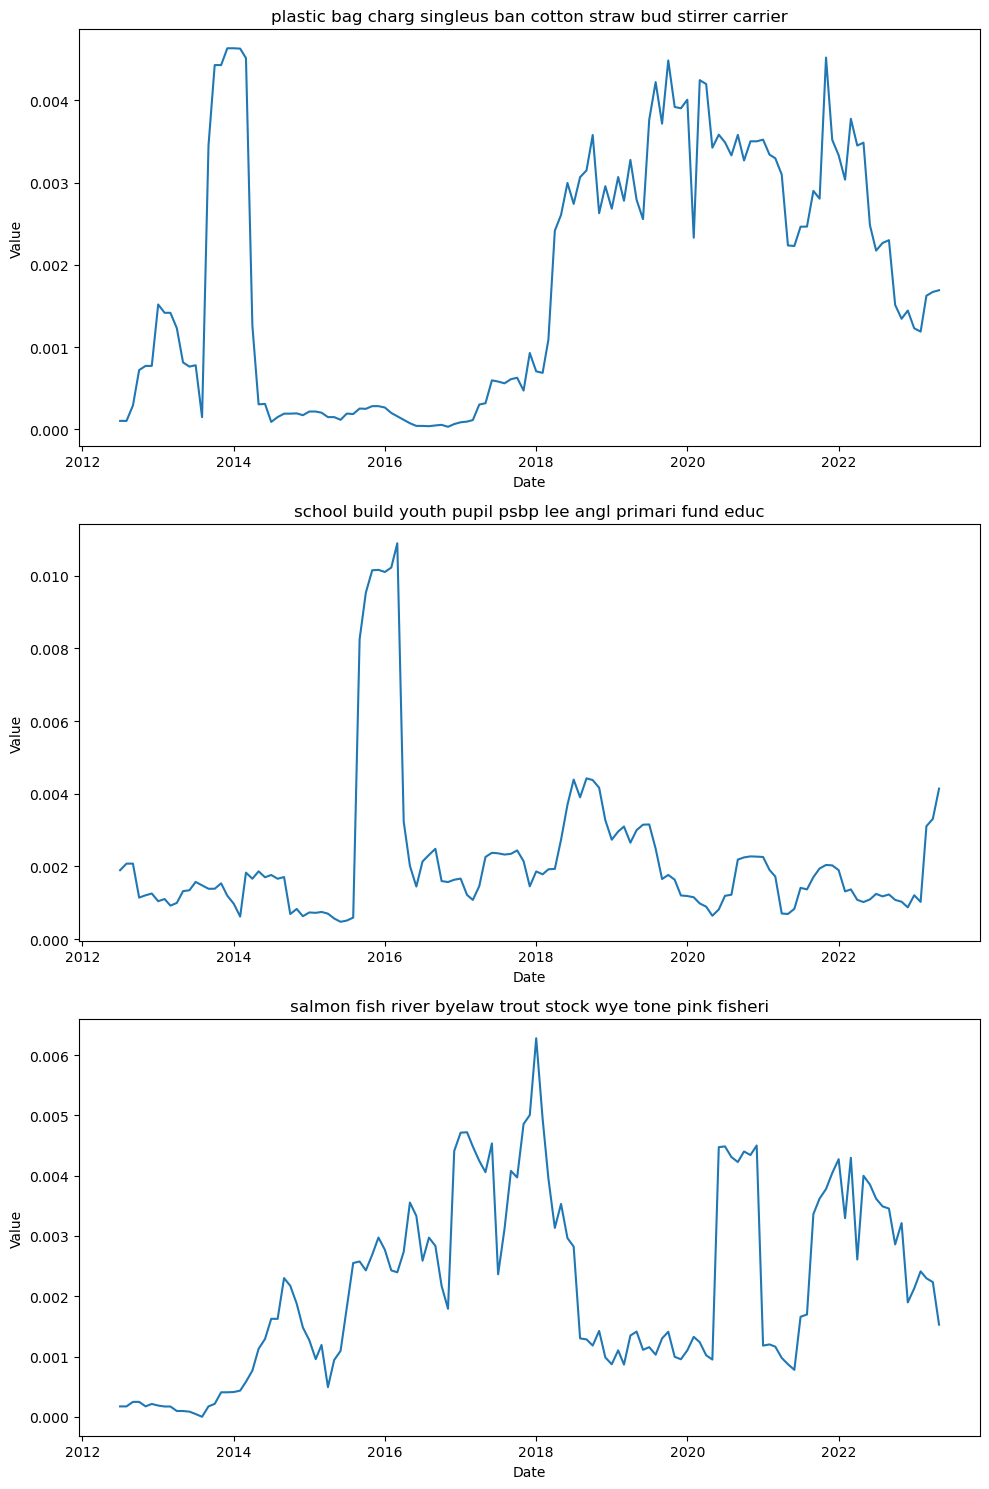

In [33]:


    
# 4 : Plastic Bags 
# 3: Schools
# 1 fish
plot(topic_model_results[0], [5,4,2])

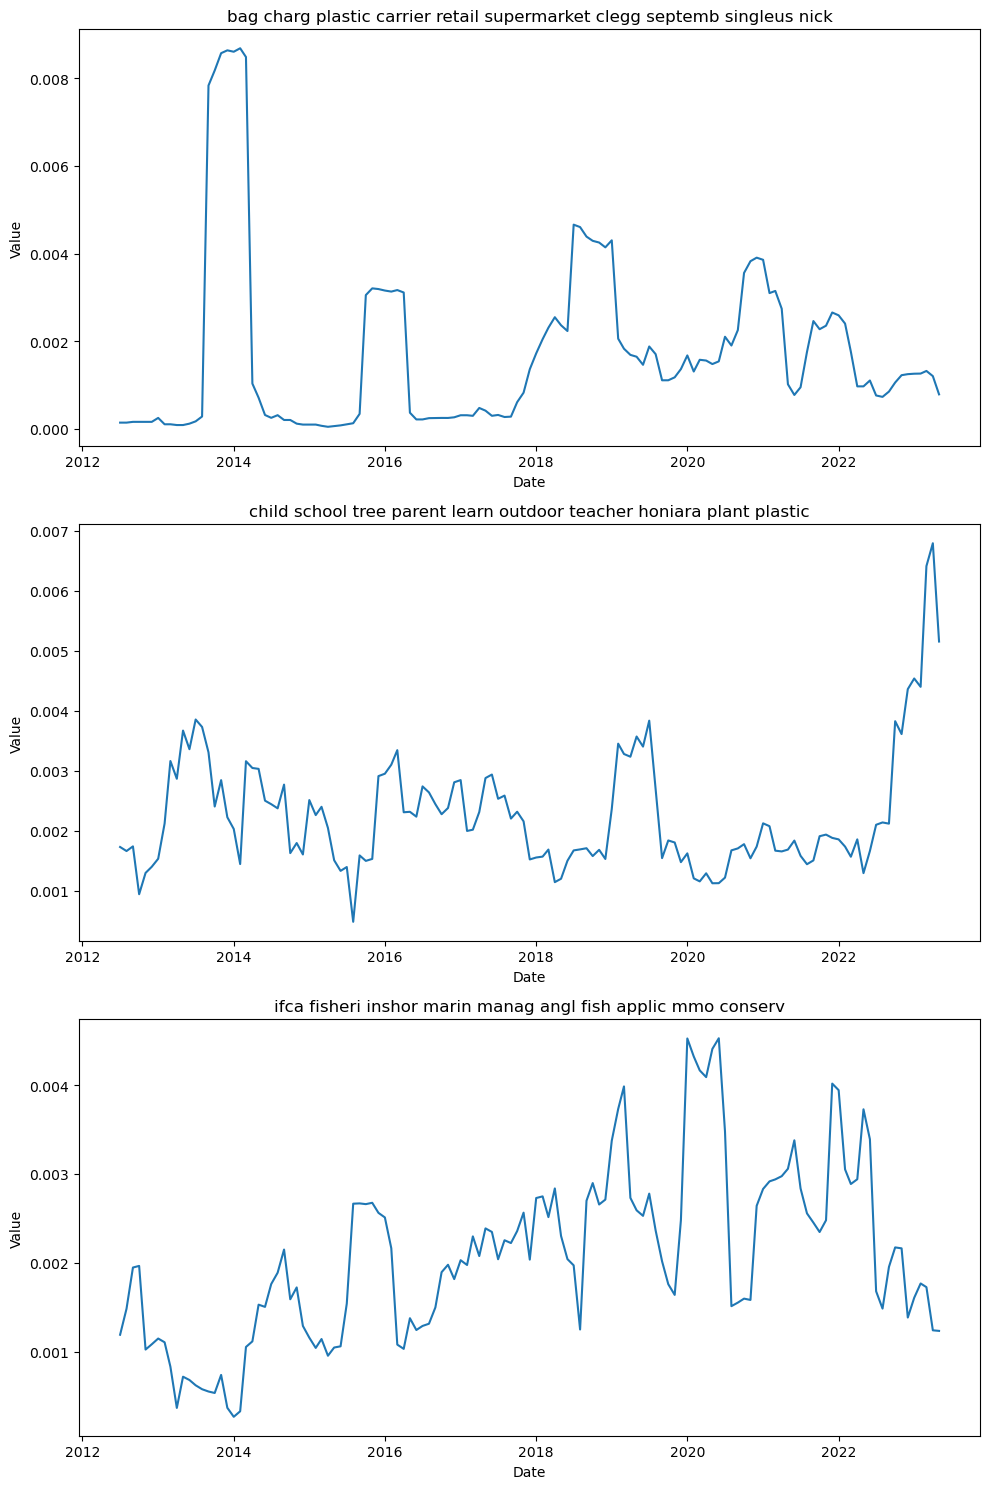

In [34]:
# 1: plastic Bags
# 4: child schools
# 8 fish
plot(topic_model_results[1], [2,5,9])

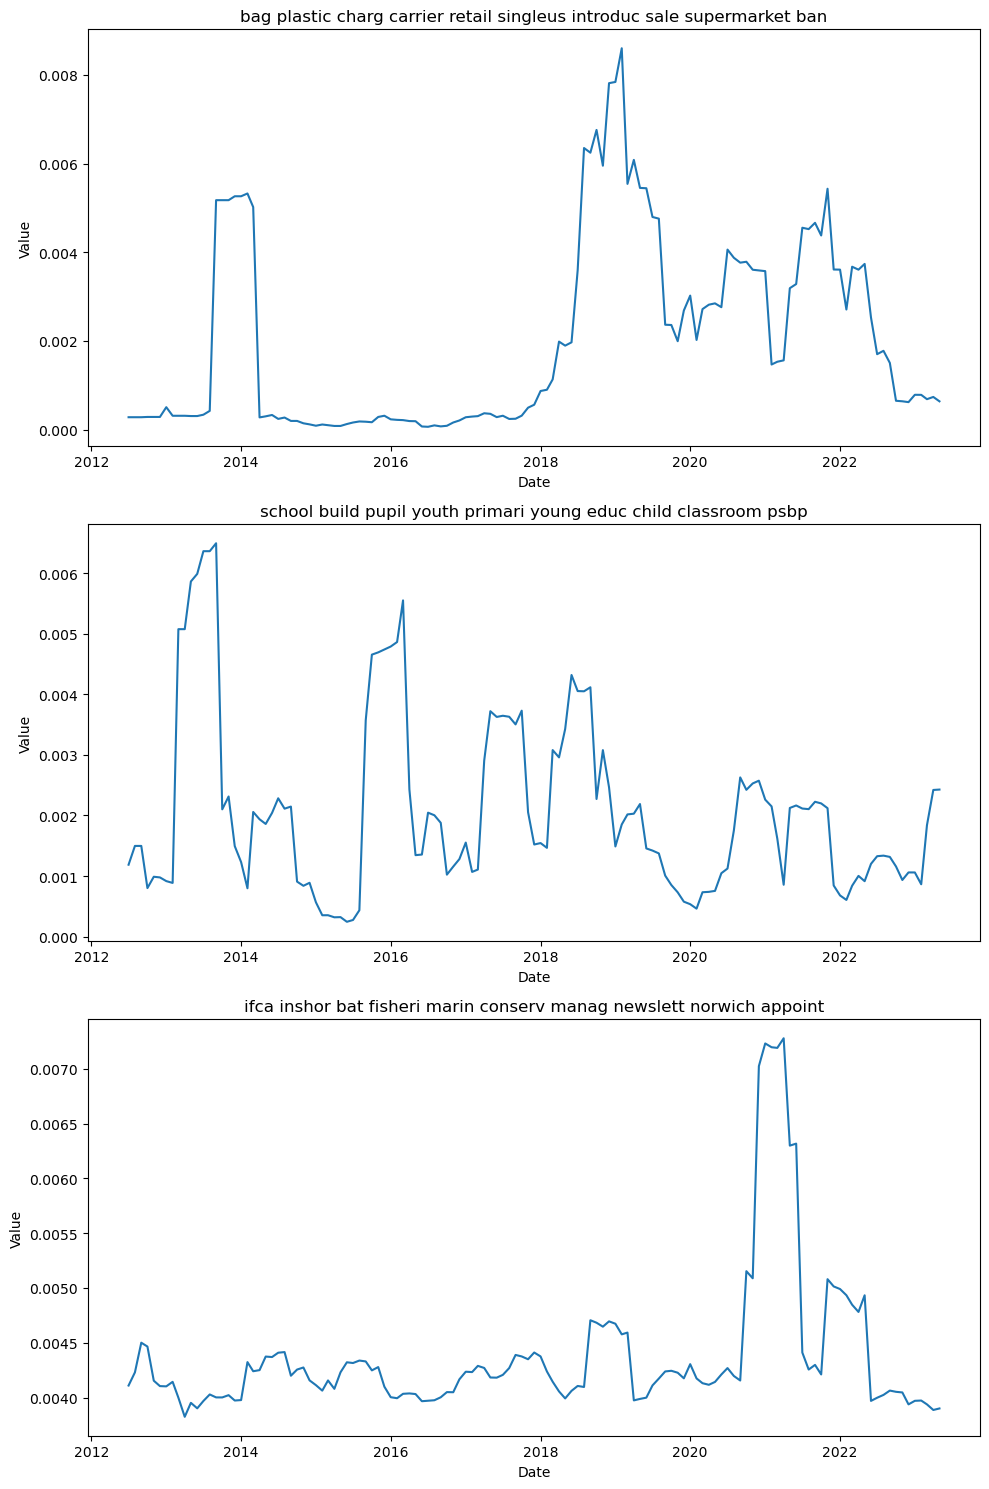

In [35]:
# plastic Bag : 1
# Schools : 3 
# fish : 8
plot(topic_model_results[2], [2,4,10])

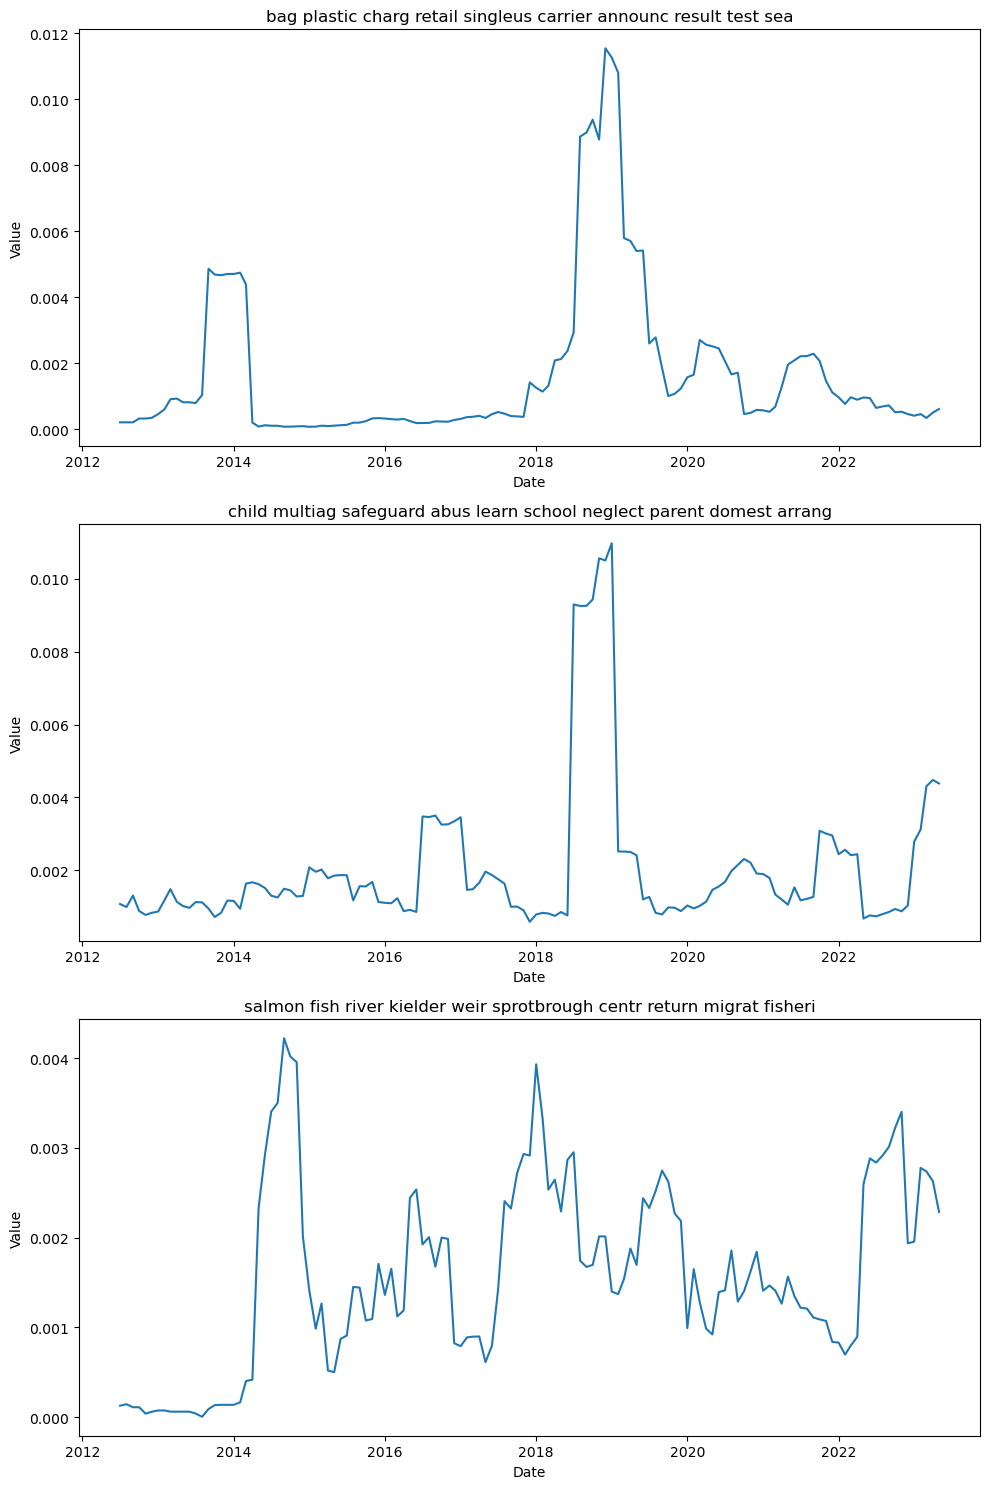

In [39]:
# 5: plastic bags
# 3: fish
# 6 :child 

plot(topic_model_results[5], [5,6,3])

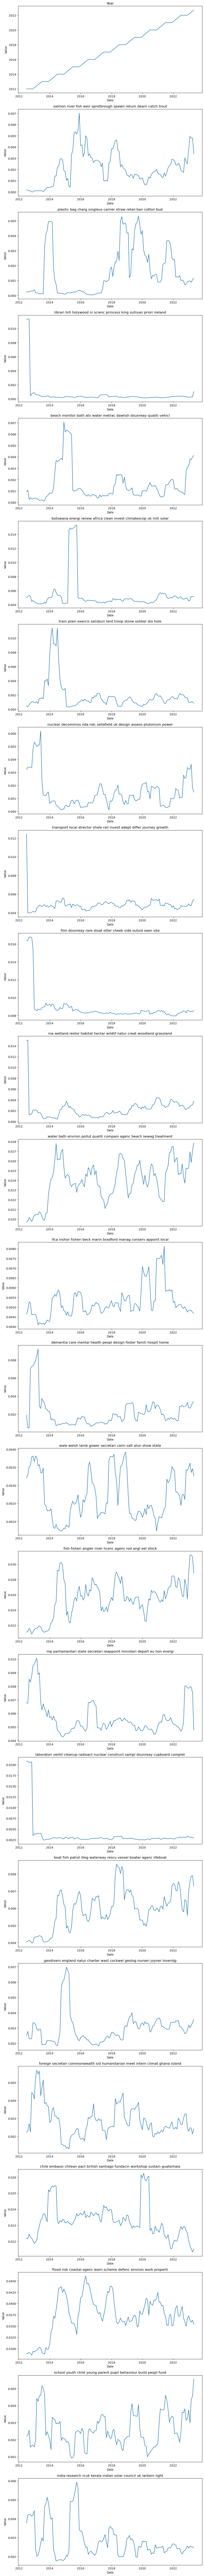

In [40]:
# 3: plastic bags
# 13: fish
# 25 :child 

plot(topic_model_results[6], [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,17,18,19,20,21,22,23,24,25,26])